In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
diamond = pd.read_csv('./input/data.csv')


(7, 0)

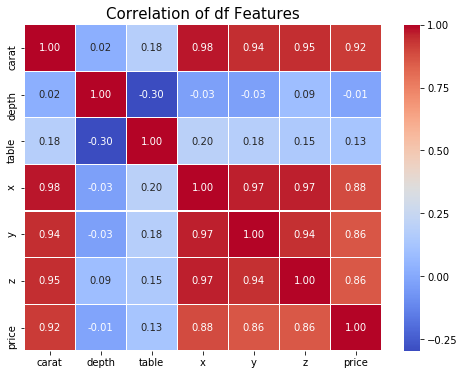

In [3]:
corr = diamond.corr()
plt.figure(figsize = (8,6))
hm=sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30, cmap = "coolwarm")
plt.title('Correlation of df Features', y = 1.05, size=15)
hm.set_ylim(7,0,0)

([<matplotlib.patches.Wedge at 0x11e5a6b90>,
 [Text(-0.673958139799957, 0.869356328439255, ''),
  Text(-1.0447275324110605, -0.3443027490774599, ''),
  Text(-0.13649351387548092, -1.0914987497335598, ''),
  Text(0.8732928438506007, -0.6688494665313943, ''),
  Text(1.072990723667682, 0.24226206249246823, ''),
  Text(0.6592815670216539, 0.8805383667878832, ''),
  Text(0.17985657340428024, 1.0851965780462407, '')],
 [Text(-0.36761353079997655, 0.47419436096686635, '21.0%'),
  Text(-0.5698513813151239, -0.18780149949679628, '18.2%'),
  Text(-0.07445100756844412, -0.5953629544001234, '17.8%'),
  Text(0.47634155119123667, -0.36482698174439687, '15.4%'),
  Text(0.5852676674550991, 0.13214294317770992, '12.5%'),
  Text(0.3596081274663566, 0.4802936546115726, '10.0%'),
  Text(0.09810358549324376, 0.5919254062070404, '5.2%')])

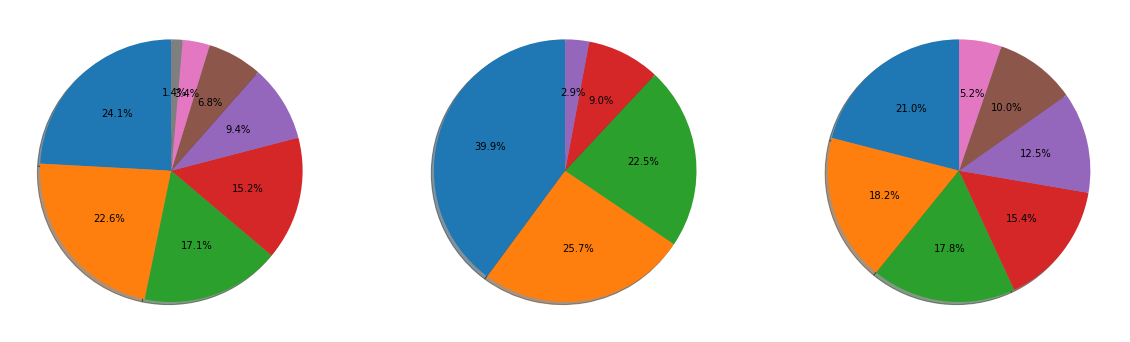

In [4]:
d1 = diamond['clarity'].value_counts()
d2 = diamond['cut'].value_counts()
d3 = diamond['color'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(20,20))
axs[0].pie(d1, autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].pie(d2, autopct='%1.1f%%', shadow=True, startangle=90)
axs[2].pie(d3, autopct='%1.1f%%', shadow=True, startangle=90)



In [5]:
diamond['clarity'].unique()

array(['SI2', 'I1', 'VS2', 'SI1', 'VS1', 'VVS2', 'IF', 'VVS1'],
      dtype=object)

In [6]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [7]:
# To categorical
numeric_cut = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
numeric_color = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
numeric_clarity = {'I1': 8 , 'SI2': 7, 'SI1': 6, 'VS2': 5, 'VS1': 4, 'VVS2':3 , 'VVS1': 2, 'IF':1}
diamond.replace({'cut': numeric_cut, 'color': numeric_color, 'clarity': numeric_clarity}, inplace=True)

In [8]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,1,4,7,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,3,5,7,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,2,3,7,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,1,3,8,63.3,60.0,4.68,4.64,2.95,630
4,0.31,1,4,5,61.6,55.0,4.39,4.37,2.70,698


(10, 0)

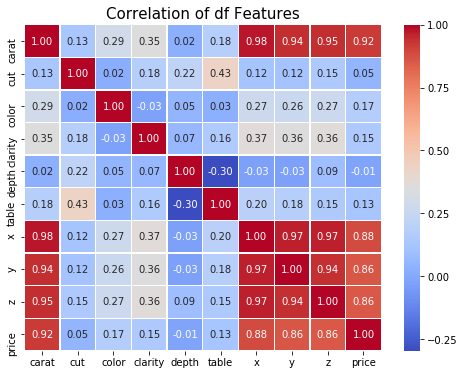

In [9]:
corr = diamond.corr()
plt.figure(figsize = (8,6))
hm=sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30, cmap = "coolwarm")
plt.title('Correlation of df Features', y = 1.05, size=15)
hm.set_ylim(10,0,0)

In [10]:
# STANDARD SCALER. Normalized the data by subtracting the mean from each data point and dividing by the std deviation.
columns = ['depth', 'table', 'x', 'y', 'z']
for col in columns:
    diamond[col] = (diamond[col] - np.mean(diamond[col])) / np.std(diamond[col]) 

diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,1,4,7,0.106170,-0.205764,2.411028,2.276274,2.339667,12831
1,2.43,3,5,7,1.013798,-0.205764,2.517870,2.397719,2.607386,16170
2,0.80,2,3,7,-0.522188,-0.205764,0.265287,0.237737,0.183828,2797
3,0.40,1,3,8,1.083616,1.138849,-0.936684,-0.950686,-0.830684,630
4,0.31,1,4,5,-0.103283,-1.102173,-1.194885,-1.184901,-1.182945,698


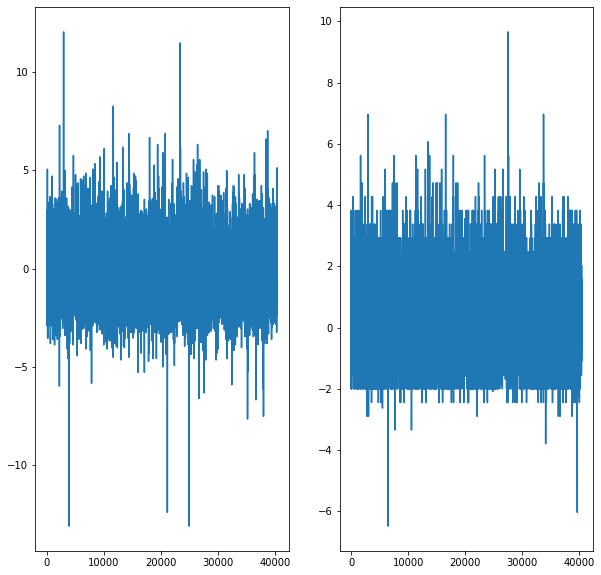

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(diamond['depth'])
axs[1].plot(diamond['table'])

In [12]:
diamond.shape

(40455, 10)

In [15]:
diamond = diamond[(diamond['depth']>=-4 ) & (diamond['depth']<=4)]
diamond = diamond[(diamond['table']>=-2 ) & (diamond['table']<=4)]


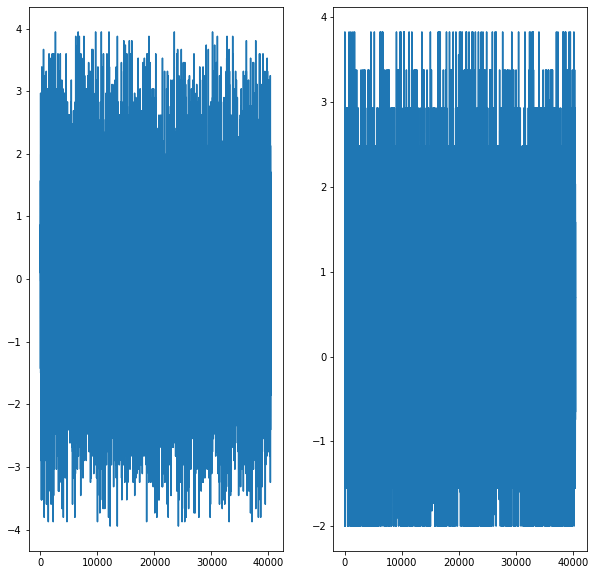

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(diamond['depth'])
axs[1].plot(diamond['table'])

In [17]:
diamond.shape

(40201, 10)

(10, 0)

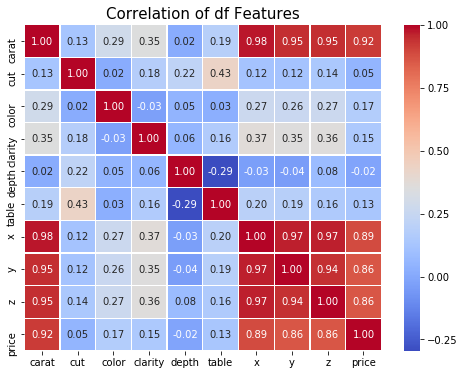

In [18]:
corr = diamond.corr()
plt.figure(figsize = (8,6))
hm=sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30, cmap = "coolwarm")
plt.title('Correlation of df Features', y = 1.05, size=15)
hm.set_ylim(10,0,0)

In [19]:
# i showed that there is a very strong positive correlation between x, y, z, carat and price.
diamond.drop(columns=['x', 'y', 'z'], inplace=True)

(7, 0)

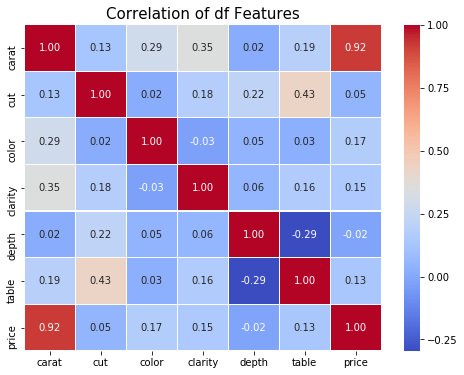

In [20]:
corr = diamond.corr()
plt.figure(figsize = (8,6))
hm=sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30, cmap = "coolwarm")
plt.title('Correlation of df Features', y = 1.05, size=15)
hm.set_ylim(7,0,0)

In [21]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [22]:
y = diamond["price"]
X = diamond[["carat", "cut", "color", "clarity", "depth", "table"]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [23]:

models = {
    #"svm": LinearSVC(),
    #"logistic": LogisticRegression(solver='lbfgs', max_iter=2000),
    "forest": RandomForestRegressor(),
    "ridge": Ridge(),
    "svr": SVR(C=1.0, epsilon=0.2),
    #"MLPClassifier": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(f"Training finished: {modelName}")


Training model: forest


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training finished: forest
Training model: ridge
Training finished: ridge
Training model: svr


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training finished: svr


In [24]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}

df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df.head()

,forest,ridge,svr,gt
0,2732.95,3686.555975,1916.802164,3068
1,7773.40,8063.227831,2887.897539,7980
2,2782.70,3187.383009,3177.347654,2967
3,3619.24,4113.525260,1852.141082,3759
4,756.10,279.629597,1763.359721,828


In [25]:
kf = KFold(n_splits=2, shuffle=True, random_state=11)
for k, v in models.items():
    scores = cross_val_score(v, X_train, y_train, scoring='r2', cv=kf, n_jobs=2)
    name = str(v)
    print(f'{name}: Average R-Squared Score:', np.mean(scores))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False): Average R-Squared Score: 0.977452759113099
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001): Average R-Squared Score: 0.9055869839062112
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False): Average R-Squared Score: -0.04673285652373682


## CAMBIANDO EL TEST

In [26]:
test_diamond = pd.read_csv('./input/test.csv')


In [27]:
test_diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,Ideal,I,VS2,62.1,54.0,5.30,5.33,3.30
1,1,1.05,Ideal,G,VS2,61.9,56.0,6.56,6.52,4.05
2,2,0.50,Premium,E,VS2,61.5,56.0,5.11,5.07,3.13
3,3,0.80,Ideal,F,VS1,62.8,56.0,5.91,5.96,3.73
4,4,0.54,Ideal,G,VS1,61.4,57.0,5.23,5.20,3.20


In [28]:
# To categorical
numeric_cut = {'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}
numeric_color = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}
numeric_clarity = {'I1': 8 , 'SI2': 7, 'SI1': 6, 'VS2': 5, 'VS1': 4, 'VVS2':3 , 'VVS1': 2, 'IF':1}
test_diamond.replace({'cut': numeric_cut, 'color': numeric_color, 'clarity': numeric_clarity}, inplace=True)

In [29]:
test_diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,1,6,5,62.1,54.0,5.30,5.33,3.30
1,1,1.05,1,4,5,61.9,56.0,6.56,6.52,4.05
2,2,0.50,2,2,5,61.5,56.0,5.11,5.07,3.13
3,3,0.80,1,3,4,62.8,56.0,5.91,5.96,3.73
4,4,0.54,1,4,4,61.4,57.0,5.23,5.20,3.20


In [30]:
columns = ['depth', 'table', 'x', 'y', 'z']
for col in columns:
    test_diamond[col] = (test_diamond[col] - np.mean(test_diamond[col])) / np.std(test_diamond[col]) 

test_diamond.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,1,6,5,0.241489,-1.537773,-0.383443,-0.360777,-0.340759
1,1,1.05,1,4,5,0.101972,-0.646693,0.744052,0.711770,0.740676
2,2,0.50,2,2,5,-0.177064,-0.646693,-0.553462,-0.595116,-0.585884
3,3,0.80,1,3,4,0.729801,-0.646693,0.162408,0.207042,0.279264
4,4,0.54,1,4,4,-0.246823,-0.201152,-0.446082,-0.477947,-0.484950


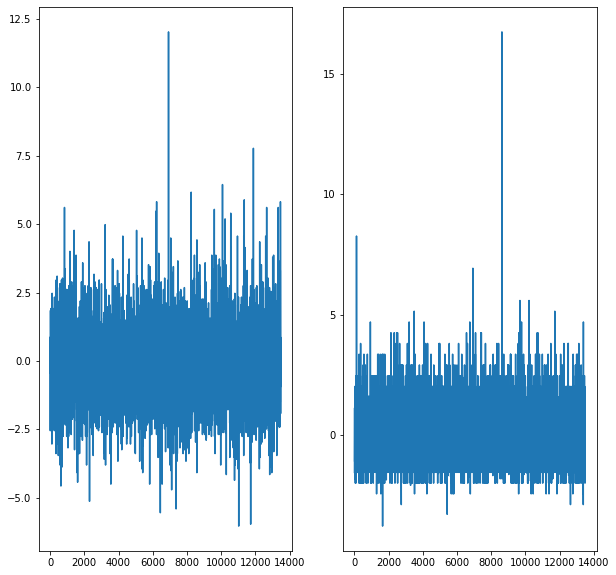

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(test_diamond['depth'])
axs[1].plot(test_diamond['table'])

In [32]:
test_diamond.drop(columns=['x', 'y', 'z'], inplace=True)

In [33]:
test_diamond.head(10)

,id,carat,cut,color,clarity,depth,table
0,0,0.56,1,6,5,0.241489,-1.537773
1,1,1.05,1,4,5,0.101972,-0.646693
2,2,0.50,2,2,5,-0.177064,-0.646693
3,3,0.80,1,3,4,0.729801,-0.646693
4,4,0.54,1,4,4,-0.246823,-0.201152
5,5,2.25,1,2,8,-0.246823,-1.537773
6,6,0.33,3,4,3,0.729801,-0.201152
7,7,0.32,2,5,1,0.032213,0.244388
8,8,0.30,2,4,4,-0.246823,1.135469
9,9,2.10,1,6,7,0.869319,-0.646693


In [34]:
d1 = {modelName:model.predict(test_diamond[["carat", "cut", "color", "clarity", "depth", "table"]]) for modelName, model in models.items()}

df1 = pd.DataFrame(d1)
df1['id']=test_diamond['id']
new = df1[['id','forest']]
new.rename(columns={"forest": "price"}, inplace=True)
new.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,id,price
0,0,1259.800000
1,1,6465.500000
2,2,1665.000000
3,3,3906.433333
4,4,1681.100000


In [36]:
new.to_csv('pruebadrop.csv', index=False)
